<a href="https://colab.research.google.com/github/jorgecote/seminario_profesional/blob/main/Actividad_2_(ANN_Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: ANN en TensorFlow

En esta actividad usted tendrá su primera aproximación al uso de TensorFlow y aprender como puede ser usado para solucionar problemas de machine learning. Corra las celdas de codigo del presente archivo. En algunas de las celdas encontrará bloques HACER siga las instrucciones para completar el código y ejecuta las eldas para ir continuando

## 1.1 Redes neuronales en TensorFlow

También podemos definir redes neuronales en TensorFlow. Consideremos primero el ejemplo de un perceptrón simple definido por una sola capa densa: y=σ(Wx+b), donde W representa una matriz de pesos, b es un sesgo, x es la entrada, σ es la función de activación sigmoidea, e y es la salida. También podemos visualizar esta operación usando un gráfico:

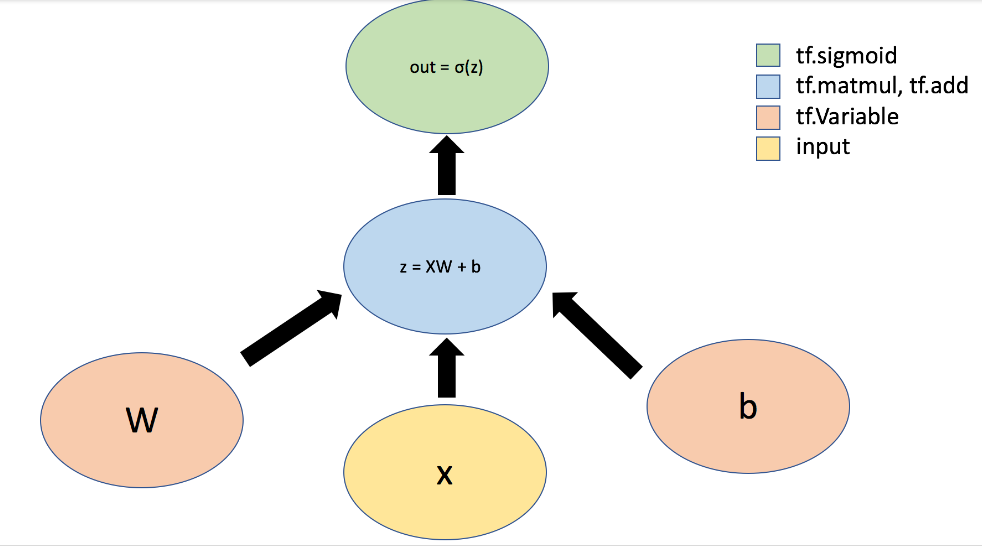



In [ ]:
import tensorflow as tf

In [ ]:
### Defniendo red neuronal de una capa oculta ###

# n_output_nodes: numero de nodos de salida
# input_shape: tamaño de la entrada
# x: Datos de entrada

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Defina e inicialice los parámetros: una matriz de pesos W y bias b
    # Note que la inicialización de parámtros se realiza de manera aleatorio!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note la dimensionalidad
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note la dimensionalidad

  def call(self, x):
    '''HACER: defina la operación para z (consejo: use producto matricial)'''
    z =      # HACER
    '''HACER: defina la operación para la salida (consejo: use función sigmoidal)'''
    y =      # HACER
    return y



In [ ]:
# Debido a que los parámetros son inicializados aleatoriamente, Se ajusta una función pseudoaleatoria para asegurar reproducibilidad
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())

## 1.2 Diferenciación automática

La diferenciación automática es una de las partes más importantes de TensorFlow y es la columna vertebral del entrenamiento con retropropagación. Usaremos TensorFlow GradientTape tf.GradientTape para rastrear operaciones para calcular gradientes más adelante.

Cuando se realiza un paso hacia adelante a través de la red, todas las operaciones de paso hacia adelante se graban en una "cinta"; luego, para calcular el gradiente, la cinta se reproduce al revés. De forma predeterminada, la cinta se descarta después de reproducirla al revés; esto significa que un tf.GradientTape en particular solo puede calcular un gradiente y las llamadas posteriores arrojan un error de tiempo de ejecución. Sin embargo, podemos calcular múltiples gradientes durante el mismo cálculo creando una cinta de gradiente persistente.

Primero, veremos cómo podemos calcular gradientes usando GradientTape y acceder a ellos para realizar el cálculo. Definimos la función simple y=x^2 y calculamos el gradiente:

In [ ]:
### Cálculo de gradiente con GradientTape ###

# y = x^2
# Example: x = 3.0
''' HACER: Defina un Tensor variable escalar y asignele un valor de coma flotante '''
x =         # HACER

# Inicialización de la cinta de gradiente
with tf.GradientTape() as tape:
''' Defina la función que se va a rastrear '''
  y =       # HACER
''' Obtenga el gradiente -- derivada de y con respecto a x '''
dy_dx =     # HACER

assert dy_dx.numpy() == 6.0

Al entrenar redes neuronales, utilizamos diferenciación y descenso de gradiente estocástico (SGD) para optimizar una función de pérdida. Ahora que tenemos una idea de cómo se puede usar GradientTape para calcular y acceder a derivadas, veremos un ejemplo en el que usamos diferenciación automática y SGD para encontrar el mínimo de L=(x−xf)^2. Aquí xf es una variable para un valor deseado que estamos tratando de optimizar; L representa una pérdida que estamos tratando de minimizar. Considerar cómo podemos calcular esto usando GradientTape nos prepara muy bien para futuros laboratorios en los que usemos el descenso de gradiente para optimizar las pérdidas completas de la red neuronal.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### Minimización de función con diferenciación automática y gradiente descendente ###

''' HACER: Inicialice un valor aleatorio para nuestro x inicial. (consejo: obtenga un valor aleatorio de una distribución normal) '''
x =     # HACER
print("Inicializando x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# Ejecutaremos gradiente descendente durante un número de iteraciones. En cada iteración calcularemos la función de pérdidas,
# calcule la derivada de las pérdidas con respecto a x, y realice la actualización del parámetro por gradiente descendente.

''' HACER: Crear un ciclo for que lleve a cabo cierta cantidad de iteraciones '''
for         # HACER
  with tf.GradientTape() as tape:
    '''HACER: defina las pérdidas como se describieron arriba '''
    loss =  # HACER

  # minimización de las pérdidas usando la cinta de gradiente
  ''' HACER: calcule la derivada de la pérdida con respecto a x '''
  grad =  # HACER
  ''' HACER: calcule el nuevo valor de x y actualicelo '''
  new_x =   # HACER

  history.append(x.numpy()[0])

# Grafica de la evolución de x a medida que se optimiza hacia x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

## 1.3 Callbacks y guardado de modelos

Construya un modelo de redes neuronales con una capa oculta, calcule el gradiente descendente y la retropropagación para entrenar el modelo usando las herramientas de TensorFlow. Utilice la tabla de verdad de la compuerta XOR como datos de entrenamiento. Agregue callbacks para que detenga el entrenamiento y cuando se alcance un cierto nivel de exactitud. También agregue callbacks para que el modelo guarde los pesos durante el entrenamiento (por ejemplo cada iteración).